# Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")     ## To ignore warnings
import scipy.cluster.hierarchy as sch ## For Dengrogram
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN ## For Building Models
from sklearn.preprocessing import MinMaxScaler,StandardScaler ## For Pre-processing data
from sklearn.metrics import silhouette_score, calinski_harabasz_score ## For Evaluating Different models

# EDA

In [2]:
airline=pd.read_excel("EastWestAirlines.xlsx",engine="openpyxl",sheet_name="data")

In [3]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<AxesSubplot:xlabel='Award?', ylabel='Density'>

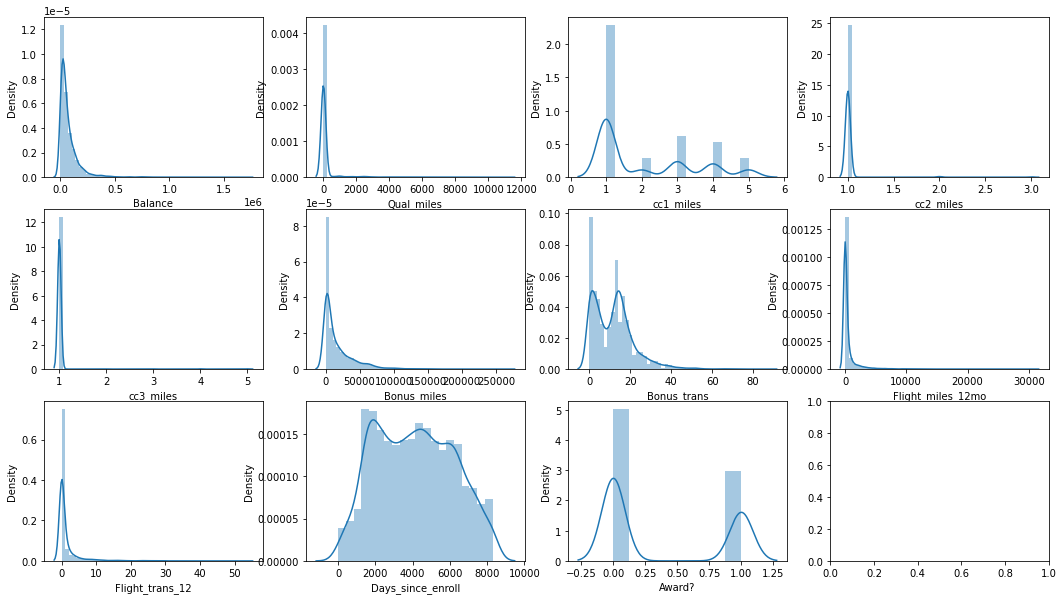

In [6]:
fig,axis=plt.subplots(3,4,figsize=(18,10))
sns.distplot(airline["Balance"],ax=axis[0,0])
sns.distplot(airline["Qual_miles"],ax=axis[0,1])
sns.distplot(airline["cc1_miles"],ax=axis[0,2])
sns.distplot(airline["cc2_miles"],ax=axis[0,3])
sns.distplot(airline["cc3_miles"],ax=axis[1,0])
sns.distplot(airline["Bonus_miles"],ax=axis[1,1])
sns.distplot(airline["Bonus_trans"],ax=axis[1,2])
sns.distplot(airline["Flight_miles_12mo"],ax=axis[1,3])
sns.distplot(airline["Flight_trans_12"],ax=axis[2,0])
sns.distplot(airline["Days_since_enroll"],ax=axis[2,1])
sns.distplot(airline["Award?"],ax=axis[2,2])

## Scaling Data
#### ``` Since some values are extreme we will use StandardScaler for scaling data ```

In [7]:
scale=StandardScaler()
scaled_data=scale.fit_transform(airline.iloc[:,1:])

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaled_n=MinMaxScaler()
scale_norm=scaled_n.fit_transform(airline.iloc[:,1:])

# <span style="color:Red">Hirarchical Clustering</span>

Text(0, 0.5, 'Euclidean Distance')

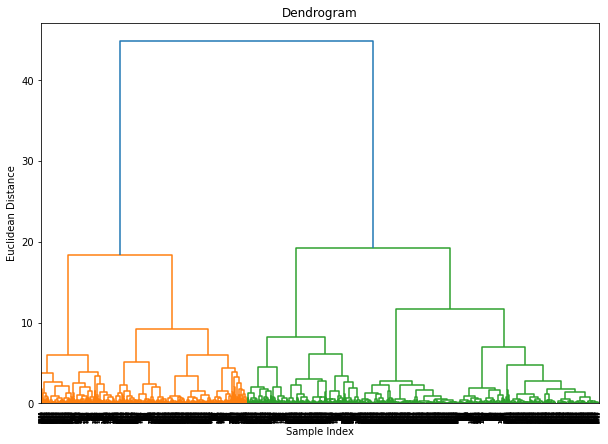

In [9]:
plt.figure(figsize=(10,7))
sch.dendrogram(sch.linkage(scale_norm,method="ward"))
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")

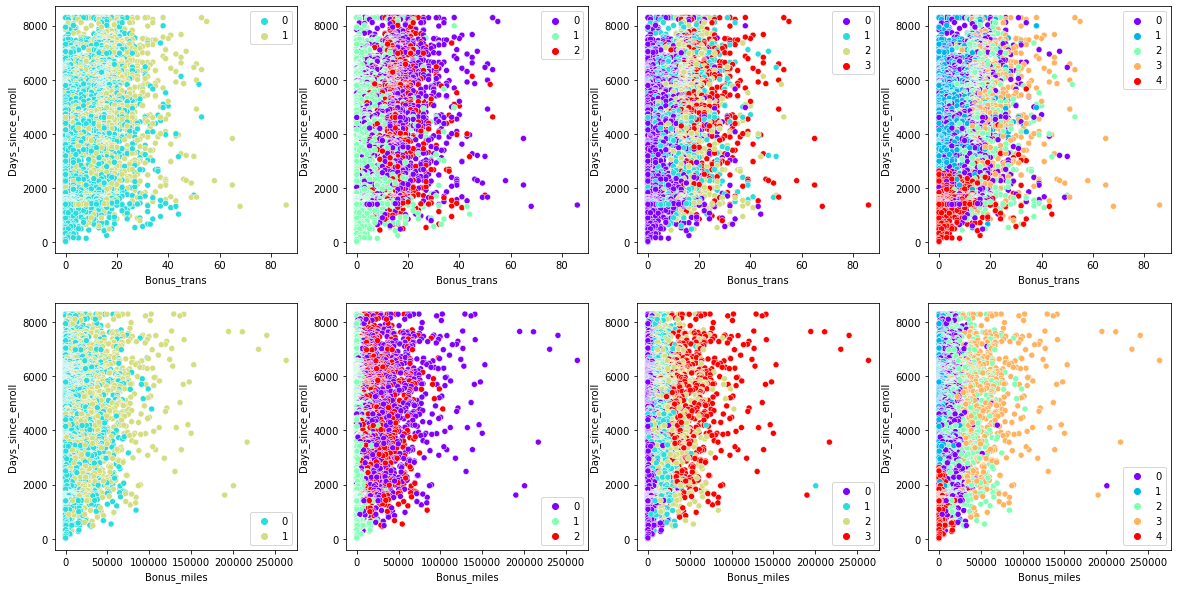

In [10]:
num_clusters=[2,3,4,5]
fig, axis= plt.subplots(2,4,figsize=(20,10))
b=0
for n in num_clusters:
    a=0
    hairarchy_model=AgglomerativeClustering(n_clusters=n,affinity="euclidean",linkage="ward")
    hairarchy_model.fit(scale_norm)
    sns.scatterplot(x="Bonus_trans",y="Days_since_enroll",data=airline,hue=hairarchy_model.labels_,palette="rainbow",ax=axis[a,b])
    a+=1
    sns.scatterplot(x="Bonus_miles",y="Days_since_enroll",data=airline,hue=hairarchy_model.labels_,palette="rainbow",ax=axis[a,b])
    b+=1
    

### Taking 3 clusters looks better then all other with scatterplot

#### Computing Evaluations with silhouette score  and Calinski harabasz score

In [11]:
hairarchy_model_3=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
hairarchy_model_3.fit(scale_norm)
hairarchy_model_4=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")
hairarchy_model_4.fit(scale_norm)
scores_hairarcy=pd.DataFrame({"n_clusters":[3,4],"silhouette score":[silhouette_score(scale_norm,hairarchy_model_3.labels_),silhouette_score(scale_norm,hairarchy_model_4.labels_)],
                              "Calinski harabasz score":[calinski_harabasz_score(scale_norm,hairarchy_model_3.labels_),calinski_harabasz_score(scale_norm,hairarchy_model_4.labels_)]})

In [12]:
scores_hairarcy

,n_clusters,silhouette score,Calinski harabasz score
0,3,0.435502,3727.216986
1,4,0.424943,3864.675394


# <span style="color:Red">Kmean Clustering</span>

In [13]:
num_clusters=np.arange(2,25,1)
s_score=[]  ### For silhouette score
ch_score=[] ### For calinski harabasz score
wcd=[]      ### For Ploting Elbow Curve

for n in num_clusters:
    kmeans_model=KMeans(n_clusters=n,random_state=10)
    kmeans_model.fit(scale_norm)
    s_score.append(silhouette_score(scale_norm,kmeans_model.labels_))
    ch_score.append(calinski_harabasz_score(scale_norm,kmeans_model.labels_))
    wcd.append(kmeans_model.inertia_)
    

## Ploting Elbow curve

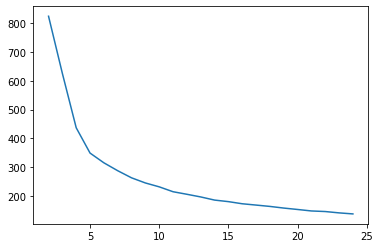

In [14]:
plt.plot(num_clusters,wcd)

In [15]:
scores_kmeans=pd.DataFrame({"n_clusters":num_clusters,"silhouette score":s_score,"Calinski harabasz score":ch_score})
scores_kmeans

,n_clusters,silhouette score,Calinski harabasz score
0,2,0.535931,4887.176729
1,3,0.464845,3853.102397
2,4,0.474838,4251.014455
3,5,0.443067,4240.307879
4,6,0.402162,3840.675853
5,7,0.390938,3568.145414
6,8,0.380838,3398.027030
7,9,0.341408,3224.552667
8,10,0.336268,3057.870541
9,11,0.350567,2999.790329


### For number of cluster 4-7 wcd is decreasing slowly, let's Visualize it

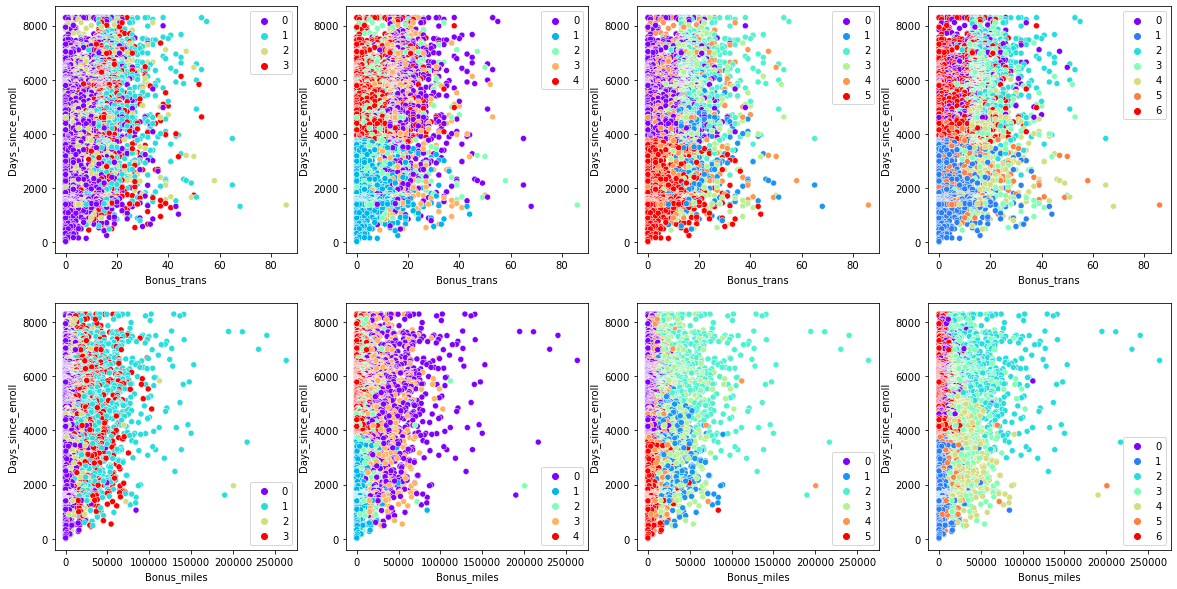

In [16]:
num_clusters=[4,5,6,7]
fig, axis= plt.subplots(2,4,figsize=(20,10))
b=0
for n in num_clusters:
    a=0
    kmeans_model=KMeans(n_clusters=n,random_state=10)
    kmeans_model.fit(scale_norm)
    s_score.append(silhouette_score(scale_norm,kmeans_model.labels_))
    ch_score.append(calinski_harabasz_score(scale_norm,kmeans_model.labels_))
    wcd.append(kmeans_model.inertia_)
    sns.scatterplot(x="Bonus_trans",y="Days_since_enroll",data=airline,hue=kmeans_model.labels_,palette="rainbow",ax=axis[a,b])
    a+=1
    sns.scatterplot(x="Bonus_miles",y="Days_since_enroll",data=airline,hue=kmeans_model.labels_,palette="rainbow",ax=axis[a,b])
    b+=1

# <span style="color:Red">DBSCAN Clustering</span>

<AxesSubplot:>

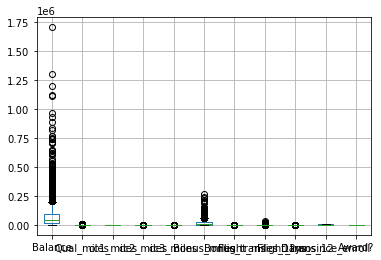

In [17]:
airline.iloc[:,1:].boxplot()

<AxesSubplot:>

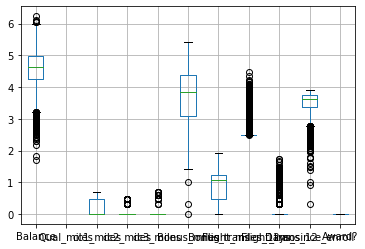

In [18]:
airline.iloc[:,1:].apply(np.log10).boxplot()

In [19]:
n=2
while n<4:
    for e in np.arange(0.2,2,0.2):
        dbscan_model=DBSCAN(eps=e,min_samples=n)
        dbscan_model.fit(scale_norm)
        print("For eps {} and min_samle {}".format(e,n))
        print(dbscan_model.labels_[:50])
        print("---------------------------------------")
    n+=1

For eps 0.2 and min_samle 2
[ 0  0  0  0  1  0  2  3 -1  4  5  6  5  0  0  1  1  3  4  4  6  3  0  0
  0  0  0  0  4  3  2  0  7  0  0  1  3  0  4  3  0  1  3  4  2  3  5  3
  4  0]
---------------------------------------
For eps 0.4 and min_samle 2
[ 0  0  0  0  1  0  0  1 -1  1  0  1  0  0  0  1  1  1  1  1  1  1  0  0
  0  0  0  0  1  1  0  0  0  0  0  1  1  0  1  1  0  1  1  1  0  1  0  1
  1  0]
---------------------------------------
For eps 0.6000000000000001 and min_samle 2
[0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 1 1 0 1 1 1 0 1 0 1 1 0]
---------------------------------------
For eps 0.8 and min_samle 2
[0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 1 1 0 1 1 1 0 1 0 1 1 0]
---------------------------------------
For eps 1.0 and min_samle 2
[0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 1 1 0 1 1 1 0 1 0 1 1 0]
---------------------------------------
For eps 1.2 and min_samle 2


## Labels for eps=0.2 and and min_sample=2,3 has more than 2 clusters 

In [20]:
n=2
s_score=[]  ### For silhouette score
ch_score=[] ### For calinski harabasz score
while n<20:
        dbscan_model=DBSCAN(eps=0.2,min_samples=n)
        dbscan_model.fit(scale_norm)
        s_score.append(silhouette_score(scale_norm,dbscan_model.labels_))
        ch_score.append(calinski_harabasz_score(scale_norm,dbscan_model.labels_))
        n+=1

In [21]:
scores_dbscan=pd.DataFrame({"n_clusters":[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],"silhouette score":s_score,"Calinski harabasz score":ch_score})
scores_dbscan

,n_clusters,silhouette score,Calinski harabasz score
0,2,0.190509,582.174768
1,3,0.221181,1076.398342
2,4,0.218079,1063.966768
3,5,0.220390,1198.198874
4,6,0.218903,1165.014232
5,7,0.217769,1235.239425
6,8,0.216960,1228.151284
7,9,0.215205,1201.505383
8,10,0.214864,1198.273008
9,11,0.212573,1278.104828


## Best result shown at min samples=3 and 5

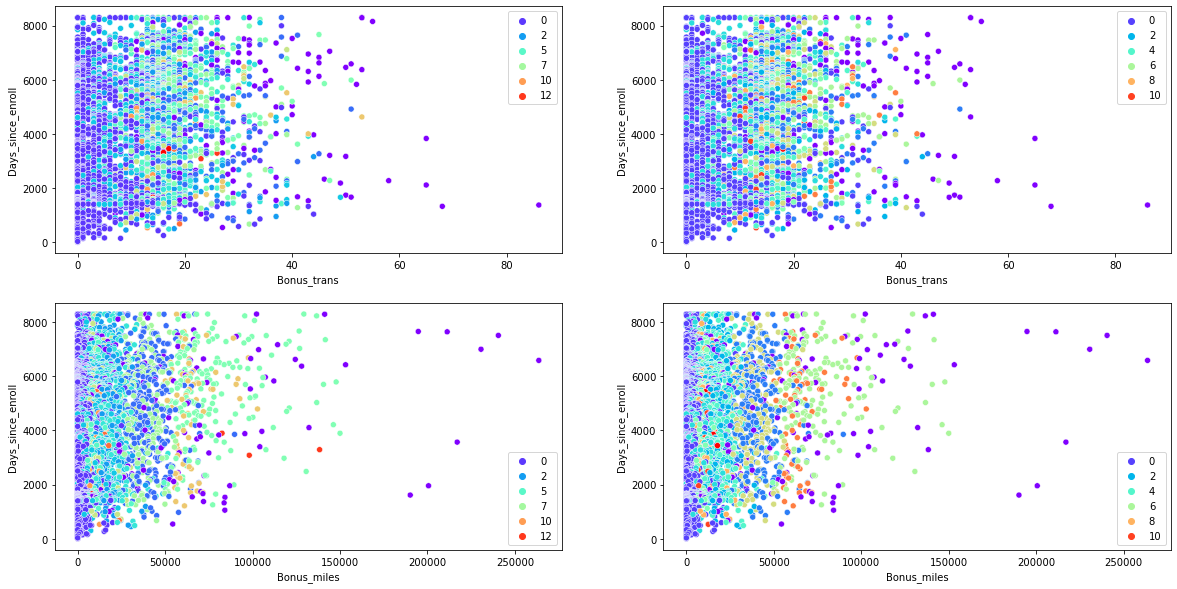

In [22]:
fig, axis= plt.subplots(2,2,figsize=(20,10))
b=0
for i in [3,5]:
    a=0
    dbscan_model=DBSCAN(eps=0.2,min_samples=i)
    dbscan_model.fit(scale_norm)
    sns.scatterplot(x="Bonus_trans",y="Days_since_enroll",data=airline,hue=dbscan_model.labels_,palette="rainbow",ax=axis[a,b])
    a+=1
    sns.scatterplot(x="Bonus_miles",y="Days_since_enroll",data=airline,hue=dbscan_model.labels_,palette="rainbow",ax=axis[a,b])
    b+=1
    

### K-means have much better score in all